# Testing HotVis on the household graph

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd

In [2]:
# load graph
hospital_graph = pp.io.read_csv_temporal_graph('graphs/Hospital/network/edges.csv', is_undirected = True, timestamp_format='%S')
# load metadata
meta_data = pd.read_csv("graphs/Hospital/network/nodes.csv")


Every class gets its own color.

In [3]:
print(meta_data["status"].unique())

['ADM' 'NUR' 'MED' 'PAT']


In [4]:
colors = {}
color_map = {'ADM': 'yellow', 'NUR': 'green', 'MED': 'blue', 'PAT':'pink'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['status']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 1


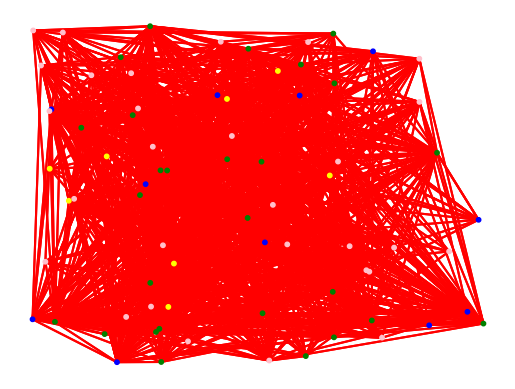

In [5]:
pp.plot(hospital_graph.to_static_graph(), backend='matplotlib' ,**style)

In [6]:
layout_2 =  HotVis(hospital_graph, 2, 50000, 50, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(hospital_graph, 3, 50000, 50, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(hospital_graph, 5, 50000, 50, alpha=[1, 0.5, 0.3, 0.2, 0.1], force=10)


100%|██████████| 50000/50000 [00:08<00:00, 5625.31it/s]


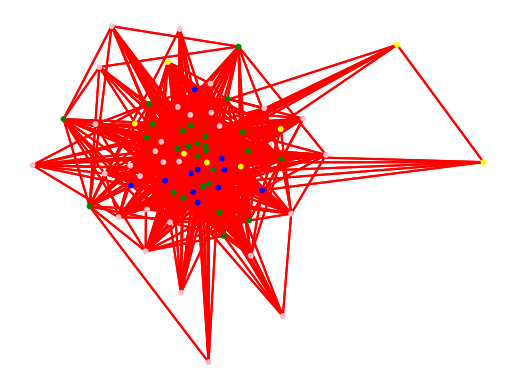

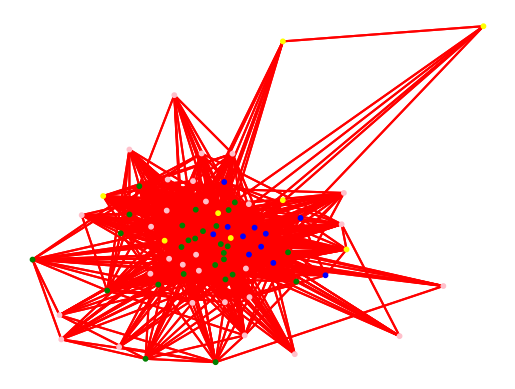

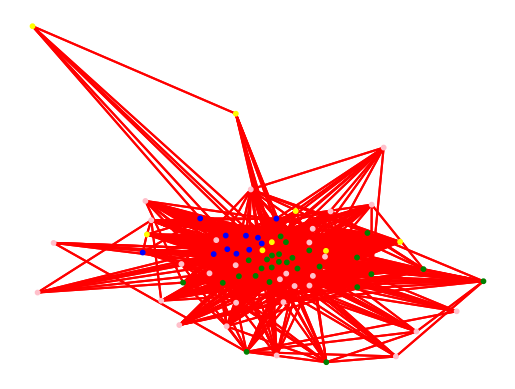

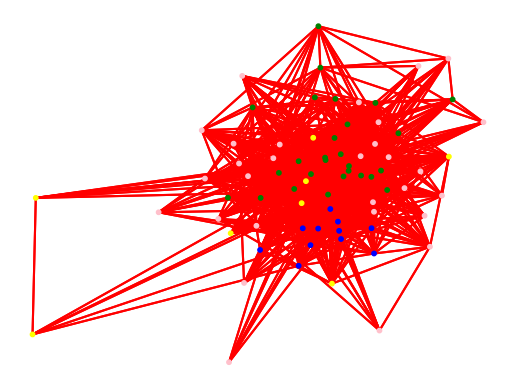

In [7]:
pp.plot(hospital_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
pp.plot(hospital_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
pp.plot(hospital_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(hospital_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)

In [8]:
clusters = meta_data.groupby('status')['index'].apply(list).values
clusters = [[str(i) for i in cluster] for cluster in clusters]
# filter nodes, wich doesn't occure in graph
valid_nodes = set(hospital_graph.mapping.node_ids)
clusters = [list(filter(lambda node: node in set(hospital_graph.mapping.node_ids), cluster)) for cluster in clusters]
# filter empty lists
clusters = [lst for lst in clusters if lst]

print(clusters)

[['0', '18', '27', '30', '62', '63', '68', '70'], ['8', '10', '11', '13', '14', '15', '17', '21', '29', '34', '69'], ['1', '2', '3', '4', '5', '6', '7', '9', '12', '16', '19', '20', '22', '23', '24', '25', '26', '28', '31', '32', '33', '35', '36', '61', '65', '66', '67'], ['37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '64', '71', '72', '73', '74']]


In [10]:
print(cluster_distance_ratio(hospital_graph, clusters, layout_2))
print(cluster_distance_ratio(hospital_graph, clusters, layout_3))
print(cluster_distance_ratio(hospital_graph, clusters, layout_5))

tensor([1.0006, 0.4814, 0.7012, 1.2451])
tensor([1.0034, 0.3690, 0.6849, 1.2369])
tensor([0.9674, 0.3194, 0.6377, 1.1975])


In [ ]:
#print(edge_crossing(hospital_graph, layout_2))
#print(edge_crossing(hospital_graph, layout_3))
#print(edge_crossing(hospital_graph, layout_5))

KeyboardInterrupt: 

In [11]:
print(causal_path_dispersion(hospital_graph, layout_2, 50))
print(causal_path_dispersion(hospital_graph, layout_3, 50))
print(causal_path_dispersion(hospital_graph, layout_5, 50))

100%|██████████| 9453/9453 [00:07<00:00, 1245.29it/s]


tensor(1.3583, dtype=torch.float64)


100%|██████████| 9453/9453 [00:07<00:00, 1257.18it/s]


tensor(1.2896, dtype=torch.float64)


100%|██████████| 9453/9453 [00:07<00:00, 1244.56it/s]


tensor(1.2897, dtype=torch.float64)


In [ ]:
print(closeness_eccentricity(hospital_graph, layout_2, 50, 0.1))
print(closeness_eccentricity(hospital_graph, layout_3, 50, 0.1))
print(closeness_eccentricity(hospital_graph, layout_5, 50, 0.1))

100%|██████████| 9453/9453 [00:07<00:00, 1244.66it/s]
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:234: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path))


tensor(0.2515, dtype=torch.float64)


100%|██████████| 9453/9453 [00:07<00:00, 1245.56it/s]


tensor(0.2598, dtype=torch.float64)


100%|██████████| 9453/9453 [00:07<00:00, 1200.56it/s]


tensor(0.2017, dtype=torch.float64)


: 